In [25]:
from datetime import datetime
from src.ScoreModels import *
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pickle

In [2]:
kwargs_RF = json.load(open('./params/RF.json', 'r'))
kwargs_XGB = json.load(open('./params/XGB.json', 'r'))
kwargs_LGBM = json.load(open('./params/LGBM.json', 'r'))

In [5]:
RF = pickle.load(open(
    './output/train/n1K_ScorePipelineRF.pickle',
    'br'
))
XGB = pickle.load(open(
    './output/train/n1K_ScorePipelineXGB.pickle',
    'br'
))
LGBM = pickle.load(open(
    './output/train/n1K_ScorePipelineLGBM.pickle',
    'br'
))

In [7]:
RF_permu = RF.permu_importance(**kwargs_RF)
XGB_permu = XGB.permu_importance(**kwargs_XGB)
LGBM_permu = LGBM.permu_importance(**kwargs_LGBM)

2024-04-11 09:43:42.342203
Pipeline activated.
  blueprint = main
  mode = predict
2024-04-11 09:43:42.342203
0 Load raw data: startDone!
2024-04-11 09:43:42.342203
1 Common data cleaning + feature engineering: Done!
2024-04-11 09:43:42.849691
2 Prepare corss-validate datasets: Done!
2024-04-11 09:43:42.849691
3 Fill null values in attendance_rate: Done!
2024-04-11 09:43:44.757127
4 Model hyper parameter tuning: start
4 Model hyper parameter tuning: Done!
2024-04-11 09:43:44.757127
5 Final model training or prediction: Done!
2024-04-11 09:43:45.109128
Pipeline completed.
2024-04-11 09:44:14.640479
Pipeline activated.
  blueprint = main
  mode = predict
2024-04-11 09:44:14.640479
0 Load raw data: startDone!
2024-04-11 09:44:14.643830
1 Common data cleaning + feature engineering: Done!
2024-04-11 09:44:15.239991
2 Prepare corss-validate datasets: Done!
2024-04-11 09:44:15.239991
3 Fill null values in attendance_rate: Done!
2024-04-11 09:44:17.200072
4 Model hyper parameter tuning: start


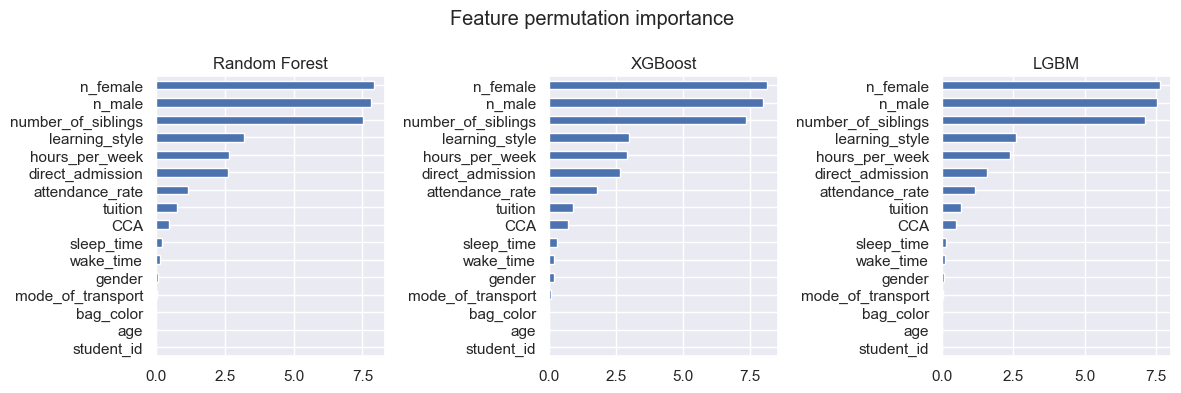

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
RF_permu.plot.barh(ax=axs[0])
XGB_permu.plot.barh(ax=axs[1])
LGBM_permu.plot.barh(ax=axs[2])
fig.suptitle('Feature permutation importance')
axs[0].set_title('Random Forest')
axs[1].set_title('XGBoost')
axs[2].set_title('LGBM')
fig.tight_layout()
plt.show()

In [14]:
RF_study = RF.__pipe_registry__[('main', '4')]['study']
XGB_study = XGB.__pipe_registry__[('main', '4')]['study']
LGBM_study = LGBM.__pipe_registry__[('main', '4')]['study']

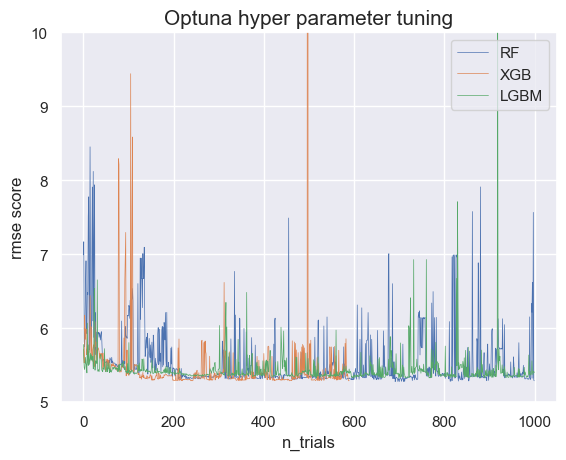

In [28]:
RF_tune = [x.values[0] for x in RF_study.trials]
plt.plot(RF_tune, label='RF', lw=0.5)
XGB_tune = [x.values[0] for x in XGB_study.trials]
plt.plot(XGB_tune, label='XGB', lw=0.5)
LGBM_tune = [x.values[0] for x in LGBM_study.trials]
plt.plot(LGBM_tune, label='LGBM', lw=0.5)
plt.legend()
plt.ylim(5, 10)
plt.xlabel('n_trials')
plt.ylabel('rmse score')
plt.title('Optuna hyper parameter tuning', fontsize = 15)
plt.show()

In [29]:
RF.score

{'main': 5.275177306449066}

In [32]:
scores = [RF.score['main'], XGB.score['main'], LGBM.score['main']]
scores = pd.Series(scores, ['RF', 'XGB', 'LGBM'], name='rmse score')
scores

RF      5.275177
XGB     5.286193
LGBM    5.321919
Name: rmse score, dtype: float64